In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
from imutils import paths
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [4]:
## data_path = '/content/drive/MyDrive/Computer vission/Dataset/cifar10/train'
data_path = '/content/gdrive/MyDrive/Computer vission/Dataset/animals'
#data_path = r"E:\8th sem\Computer vission\CIFAR10\train"
#data_path = r"E:\8th sem\Computer vission\animals\animals"

In [5]:
categories = os.listdir(data_path)
print(categories)

['panda', 'dogs', 'cats']


In [6]:
train_data = []

for c in categories:
  path = os.path.join(data_path,c)
  label = categories.index(c)
  for img in tqdm(os.listdir(path)):
    try:
      img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      img_arr = cv2.resize(img_arr,(256,256))
      #print(img_arr)
      #print(img_arr.shape)
      #plt.imshow(img_arr,cmap='gray')
    # break
    #break
      train_data.append([img_arr, label])
    except Exception as e:
      pass

print(len(train_data))

100%|██████████| 1000/1000 [00:36<00:00, 27.07it/s]

3000


In [7]:
import random
random.shuffle(train_data)

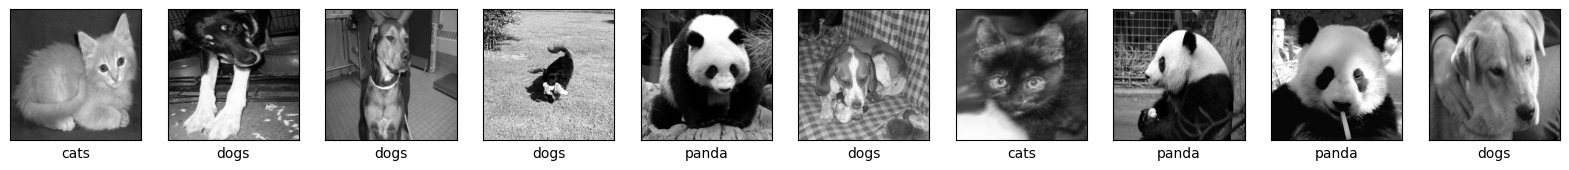

In [8]:
plt.figure(figsize=(20,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_data[i][0],cmap='gray')
    plt.xlabel(categories[train_data[i][1]])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean

# Define distance functions
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Define knn function
def knn(train_data, k_values, distance_metric):
    accuracies = []

    for k in k_values:
        folds = np.array_split(train_data, 5)

        fold_accuracies = []

        # Cross-validation
        for i in range(5):
            # Use the i-th fold as the validation set
            validation_set = folds[i]

            # Use the remaining folds as the training set
            training_set = np.concatenate([folds[j] for j in range(5) if j != i])

            correct_predictions = 0

            for v in validation_set:
                distances = []
                for t in training_set:
                    if distance_metric == 'manhattan':
                        d = manhattan_distance(t[0], v[0])
                    elif distance_metric == 'euclidean':
                        d = euclidean_distance(t[0], v[0])
                    distances.append([d, t[1]])  # Store distance and label

                distances.sort()

                k_nearest_labels = [distances[j][1] for j in range(k)]  # Extract labels of k nearest neighbors

                # Determine the most common label
                label_counts = Counter(k_nearest_labels)
                most_common_label = max(label_counts, key=label_counts.get)

                if most_common_label == v[1]:  # Compare with true label
                    correct_predictions += 1

            accuracy = correct_predictions / len(validation_set)
            fold_accuracies.append(accuracy)

        accuracies.append((k, fold_accuracies))

    return accuracies



In [10]:
train_data = np.array(train_data, dtype=object)
k_values = range(1, 11)  # Example range of k values

# Calculate accuracies using Manhattan distance
manhattan_accuracies = knn(train_data, k_values, 'manhattan')
print("Printing Manhattan 5-fold accuracies for varying values of k:")
for k, fold_accuracies in manhattan_accuracies:
    for accuracy in fold_accuracies:
        print(f'k = {k}, accuracy = {accuracy:.6f}')

# Calculate accuracies using Euclidean distance
euclidean_accuracies = knn(train_data, k_values, 'euclidean')
print("Printing Euclidean 5-fold accuracies for varying values of k:")
for k, fold_accuracies in euclidean_accuracies:
    for accuracy in fold_accuracies:
        print(f'k = {k}, accuracy = {accuracy:.6f}')

Printing Manhattan 5-fold accuracies for varying values of k:
k = 1, accuracy = 0.363333
k = 1, accuracy = 0.340000
k = 1, accuracy = 0.376667
k = 1, accuracy = 0.396667
k = 1, accuracy = 0.330000
k = 2, accuracy = 0.363333
k = 2, accuracy = 0.340000
k = 2, accuracy = 0.376667
k = 2, accuracy = 0.396667
k = 2, accuracy = 0.330000
k = 3, accuracy = 0.348333
k = 3, accuracy = 0.340000
k = 3, accuracy = 0.380000
k = 3, accuracy = 0.358333
k = 3, accuracy = 0.361667
k = 4, accuracy = 0.371667
k = 4, accuracy = 0.336667
k = 4, accuracy = 0.380000
k = 4, accuracy = 0.385000
k = 4, accuracy = 0.345000
k = 5, accuracy = 0.360000
k = 5, accuracy = 0.311667
k = 5, accuracy = 0.385000
k = 5, accuracy = 0.365000
k = 5, accuracy = 0.346667
k = 6, accuracy = 0.371667
k = 6, accuracy = 0.326667
k = 6, accuracy = 0.386667
k = 6, accuracy = 0.365000
k = 6, accuracy = 0.345000
k = 7, accuracy = 0.348333
k = 7, accuracy = 0.330000
k = 7, accuracy = 0.386667
k = 7, accuracy = 0.350000
k = 7, accuracy = 0.

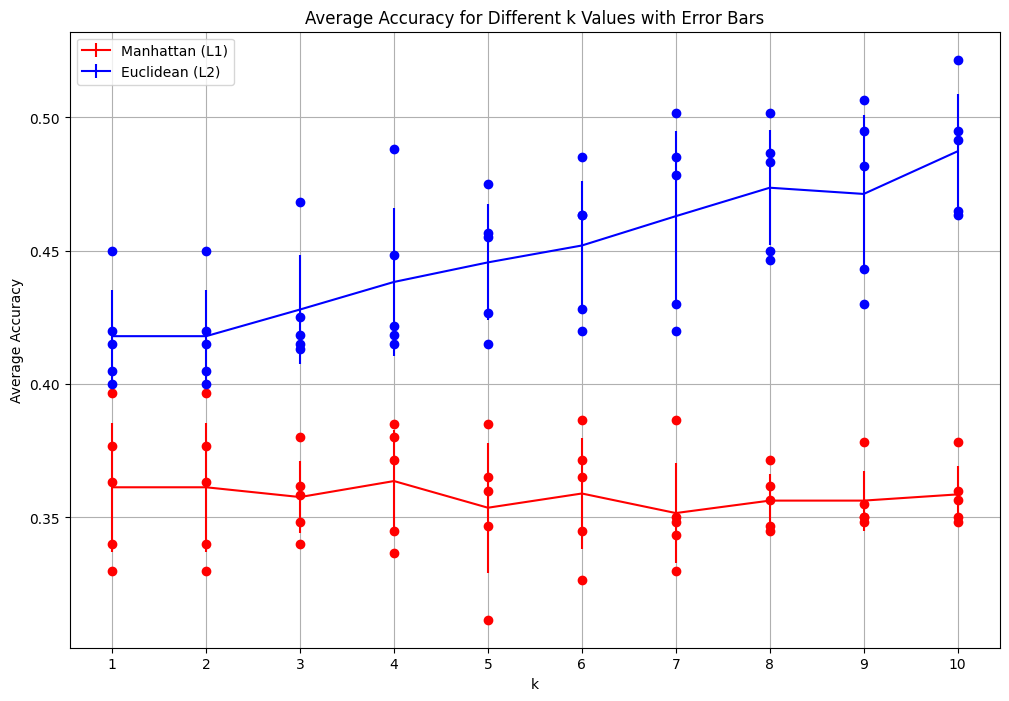

In [11]:
# Plot the results
def plot_accuracies(manhattan_accuracies, euclidean_accuracies):
    plt.figure(figsize=(12, 8))

    # Plot individual fold accuracies for Manhattan distance
    for k, fold_accuracies in manhattan_accuracies:
        plt.plot([k] * len(fold_accuracies), fold_accuracies, 'ro')

    # Plot individual fold accuracies for Euclidean distance
    for k, fold_accuracies in euclidean_accuracies:
        plt.plot([k] * len(fold_accuracies), fold_accuracies, 'bo')

    # Calculate and plot mean accuracies with error bars for Manhattan distance
    manhattan_mean_accuracies = []
    manhattan_std_accuracies = []

    for k, fold_accuracies in manhattan_accuracies:
        mean_acc = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)

        manhattan_mean_accuracies.append(mean_acc)
        manhattan_std_accuracies.append(std_acc)

    plt.errorbar(k_values, manhattan_mean_accuracies, yerr=manhattan_std_accuracies, fmt='r-', label='Manhattan (L1)')

    # Calculate and plot mean accuracies with error bars for Euclidean distance
    euclidean_mean_accuracies = []
    euclidean_std_accuracies = []

    for k, fold_accuracies in euclidean_accuracies:
        mean_acc = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)

        euclidean_mean_accuracies.append(mean_acc)
        euclidean_std_accuracies.append(std_acc)

    plt.errorbar(k_values, euclidean_mean_accuracies, yerr=euclidean_std_accuracies, fmt='b-', label='Euclidean (L2)')

    # Finalize the plot
    plt.title('Average Accuracy for Different k Values with Error Bars')
    plt.xlabel('k')
    plt.ylabel('Average Accuracy')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracies(manhattan_accuracies, euclidean_accuracies)


**Discussion**

In this part there are compares the performance of the k-NN classification model using Manhattan (L1) and Euclidean (L2) distances on a grayscale image dataset. The analysis is based on average accuracy values from 5-fold cross-validation. Key considerations include:

**Dataset Characteristics:**
Grayscale images have consistent pixel intensities, affecting how each distance metric measures differences.

**Feature Nature:**

1. Euclidean distance (L2) is sensitive to spatial differences, benefiting datasets with spatially correlated features.
2. Manhattan distance (L1) is robust to noise and outliers due to its linear measurement.


**Limitations and Improvements**

1. Normalizing data can enhance Euclidean distance performance.
2. Removing outliers improves Euclidean robustness.
3. Techniques like PCA can benefit both metrics.
4. Optimizing k values and exploring weighted k-NN can boost accuracy.
5. Applying transformations like rotation and flipping increases robustness.
6. Combining both metrics may improve overall performance.

In [15]:
test_data_path = '/content/gdrive/MyDrive/Computer vission/Dataset/Test_set'

In [28]:
categories1 = os.listdir(test_data_path)
print(categories1)

['cats', 'dogs', 'pandas']


In [29]:
test_data = []

for c in categories1:
    path = os.path.join(test_data_path, c)
    label = categories1.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_arr = cv2.resize(img_arr, (256, 256))
            test_data.append([img_arr, label])
        except Exception as e:
            pass

100%|██████████| 8/8 [00:00<00:00, 100.13it/s]


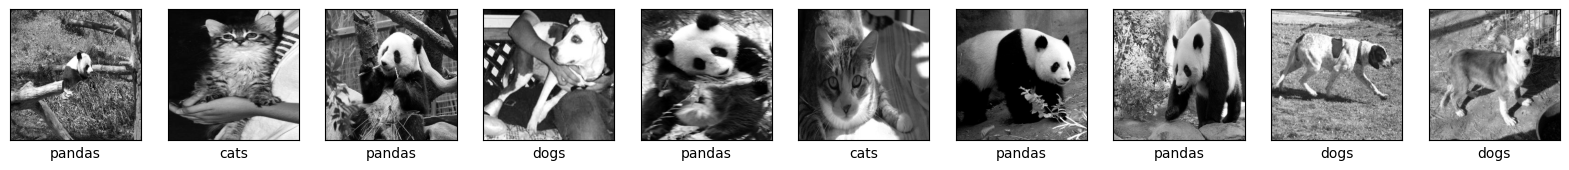

In [30]:
random.shuffle(test_data)

plt.figure(figsize=(20,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(test_data[i][0],cmap='gray')
    plt.xlabel(categories[test_data[i][1]])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [32]:
test_data = np.array(test_data, dtype=object)

# Function to predict labels using k-NN
def predict_knn(train_data, test_data, k, distance_metric):
    predictions = []

    for v in test_data:
        distances = []
        for t in train_data:
            if distance_metric == 'manhattan':
                d = manhattan_distance(t[0].flatten(), v[0].flatten())
            elif distance_metric == 'euclidean':
                d = euclidean_distance(t[0].flatten(), v[0].flatten())
            distances.append([d, t[1]])

        distances.sort()
        k_nearest_labels = [distances[j][1] for j in range(k)]
        label_counts = Counter(k_nearest_labels)
        most_common_label = max(label_counts, key=label_counts.get)
        predictions.append(most_common_label)

    return predictions

k = 3
distance_metric = 'euclidean'

# Get predictions for test data
predictions = predict_knn(train_data, test_data, k, distance_metric)

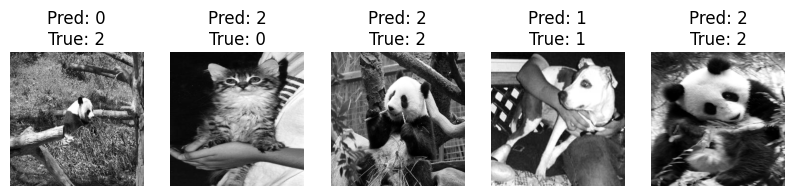

Test Accuracy: 0.48


In [35]:
def display_top_predictions(test_data, predictions, num_to_display=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_to_display):
        ax = plt.subplot(1, num_to_display, i + 1)
        plt.imshow(test_data[i][0], cmap='gray')
        ax.set_title(f"Pred: {predictions[i]}\nTrue: {test_data[i][1]}")
        plt.axis('off')
    plt.show()

# Display the top 5 predictions
display_top_predictions(test_data, predictions, num_to_display=5)

# Calculate accuracy
correct_predictions = sum(1 for i in range(len(test_data)) if predictions[i] == test_data[i][1])
accuracy = correct_predictions / len(test_data)
print(f"Test Accuracy: {accuracy:.2f}")